# 初学者向けPandas100本ノックver1.0.7
##### Shift + Enter で各セルのコードが実行されます
・print(ans[ 問題番号 ]) で回答コード例を表示  
・Python3エンジニア認定データ分析試験にも沿った問題内容   
・Pandasの各メソッドの説明は以下のサイトが分かりやすいです  
 　[note.nkmk.me](https://note.nkmk.me/pandas/)  
・"Data for Titanic passengers" from [VANDERBILT UNIVERSITY](https://biostat.app.vumc.org/wiki/Main/DataSets)  
  
**本コンテンツ作成時のpandasのバージョンは1.1.0**
  
作成日:2020年9月24日  
最終更新日:2023年1月16日  
再配布・改編不可  
作成者：[kunishou](https://qiita.com/kunishou)

In [1]:
# Shift + Enterで題材データ、回答コードを読み込んで下さい

import pandas as pd
import glob

#題材データをdfに読み込み(タイタニック号の乗客データ、テストの点数データ 等)
def initialize1():
    df = pd.read_csv('../input/titanic3.csv')
    return df

def initialize2():
    df = pd.read_csv('../input/data1.csv')
    return df

df = initialize1()
df2 = initialize2()
df3 = pd.read_csv('../input/data1_2.csv')
df4 = pd.read_csv('../input/data1_3.csv')
df5 = pd.read_csv('../input/data2.csv',encoding='cp932')

#回答コードをansリストに格納
path = sorted(glob.glob('../input/a_' + '*.txt'))

ans = []

for _ in range(len(path)):
    with open(path[_], 'r',encoding='utf-8') as f:
        ans.append(f.read())
        
print(ans[0])

[answer0]

このように回答コード例がここに表示されます。
各問題の回答コード例を表示するときはprintの前の
#を消して実行して下さい。

コード例をセル内にコピー&ペーストし
実行すると、正解のデータが表示されます


# Pandas基礎 (1 - 13)

In [2]:
# 【1】
# dfに読み込んだデータの最初の5行を表示
#print(ans[1]) #回答表示
df = initialize1() #初期化

df.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# 【2】
# dfに読み込んだデータの最後の5行を表示
#print(ans[2]) #回答表示
df = initialize1() #初期化

df.tail()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [4]:
# 【3】
# dfのDataFrameサイズを確認
#print(ans[3]) #回答表示
df = initialize1() #初期化


df.shape
print(df.shape)


(1309, 14)


In [5]:
# 【4】
# inputフォルダ内のdata1.csvファイルを
# 読み込みdf2に格納して、最初の5行を表示
#print(ans[4]) #回答表示


df2 = pd.read_csv('../input/data1.csv')
df2.head()

,name,class,English,Mathematics,History
0,A,1,80,55,65
1,B,1,55,100,83
2,C,2,65,70,95
3,D,1,40,63,70
4,E,2,76,82,79


In [6]:
# 【5】
# dfのfareの列で昇順に並び替えて表示
#print(ans[5]) #回答表示
df = initialize1() #初期化
'''
df.sort_values(['fare'], ascending=False)

df.sort_values(['fare'])

前者のdf[df['fare'].sort_values(ascending=True)]が正しくないのは、角括弧[]の中にはブール値（True/False）またはインデックス（行ラベルや位置）を指定する必要があるためです。

df['fare'].sort_values()は、ソートされた**Series（列）**を返すので、これをそのまま[]に入れるとエラーになります。Pandasは「どの行を表示すればいいのか」を判断できないためです。

1. df[df['fare'].sort_values(ascending=True)]の誤り
df['fare'].sort_values(ascending=True)を実行すると、fare列の値がソートされたSeriesが返されます。

このSeriesはインデックスと値のペアで構成されます。

このSeriesをdf[]の中に入れると、Pandasはこれをブール値のリストとして解釈しようとしますが、Seriesはブール値ではないため、エラーが発生します。

2. df.sort_values('fare', ascending=True)が正しい理由
df.sort_values()は、データフレーム自体を特定の列の値に基づいてソートするためのメソッドです。

最初の引数に'fare'という列名を指定することで、「fare列を基準にデータフレームをソートしてね」という明確な指示になります。

ascending=Trueは「昇順（小さい順）」でソートすることを意味します。
'''


#下記のほうがわかりやすい
df.sort_values('fare', ascending=True)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1254,3,1,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,15,NaN,NaN
528,2,0,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S,NaN,NaN,Belfast
581,2,0,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,NaN,NaN,Belfast
473,2,0,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S,NaN,NaN,Belfast
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,NaN,NaN,Belfast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"


In [7]:
# 【6】
# df_copyにdfをコピーして、最初の5行を表示
#print(ans[6]) #回答表示
df = initialize1() #初期化

df_copy = df.copy()
df_copy.head()


# df_c = df[df['age']>=30].copy()
# df_c


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
# 【7】
# ① dfの各列のデータ型を確認
# ② dfのcabinの列のデータ型を確認
#print(ans[7]) #回答表示
df = initialize1() #初期化
df.dtypes
df['cabin'].dtype



dtype('O')

In [9]:
# 【8】
# ① dfのpclassの列のデータ型をdtypeで確認
# ② 数値型から文字型に変換し、データ型をdtypeで確認
#print(ans[8]) #回答表示
df = initialize1() #初期化

df['pclass'].dtype
df['pclass'] = df['pclass'].astype(str)
df['pclass'].dtype



dtype('O')

In [10]:
# 【9】
# dfのレコード数(行数)を確認
#print(ans[9]) #回答表示
df = initialize1() #初期化

'''
memo

df.count()はNULL値を除いたカウントを行う。
len(df)はNULL値関係なくカウントする。
'''
df.count()
len(df)

1309

In [11]:
# 【10】
# dfのレコード数(行数)、各列のデータ型、欠損値の有無を確認
#print(ans[10]) #回答表示
df = initialize1() #初期化

print(len(df))
print(df.dtypes)
df.info()


'''
()つけるかつけないか、例えばdf.info()、df.shapeの判断の違いは、
()がついているほうがメソッドで、ついていないほうが属性。
属性は、DataFrameやSeriesが「持っている情報」を直接参照するための変数です。
VSCodeの場合メソッドは黄色で補完表示され、属性は水色で表示される。
'''

1309
pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 

'\n()つけるかつけないか、例えばdf.info()、df.shapeの判断の違いは、\n()がついているほうがメソッドで、ついていないほうが属性。\n属性は、DataFrameやSeriesが「持っている情報」を直接参照するための変数です。\nVSCodeの場合メソッドは黄色で補完表示され、属性は水色で表示される。\n'

In [12]:
# 【11】
# dfのsex,cabinの列の要素を確認
#print(ans[11]) #回答表示
df = initialize1() #初期化

df['sex'].unique()
df['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [13]:
# 【12】
# dfの列名一覧をlist形式で表示
#print(ans[12]) #回答表示
df = initialize1() #初期化

df.columns
df.columns.tolist()

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [14]:
# 【13】
# dfのインデックス一覧をndaaray形式で表示
#print(ans[13]) #回答表示
df = initialize1() #初期化#

# pandasのextention arrayとしてリストを返す
df.index.array

# numpyのndarrayとしてリストを返す
df.index.values


array([   0,    1,    2, ..., 1306, 1307, 1308], shape=(1309,))

# データ抽出 (14 - 32)

In [15]:
# 【14】
# dfのnameの列のみ表示
#print(ans[14]) #回答表示
df = initialize1() #初期化

'''
memo

Pandasは、[]と.locという2つの異なるアクセス方法を持っています。

[]（ブラケット）:
列の選択に特化しています。
単一の列名（'fare'）か、列名のリスト（['name', 'fare']）を引数として受け取ります。
スライス構文を直接使う場合は、行の選択にのみ機能するように設計されています（df[:5]）。
これは、Pandasがユーザーの意図を明確にするための設計上の選択です。

.loc:
行と列をラベルで明示的に指定するために設計されています。
[行の指定, 列の指定]という2つの引数をカンマで区切って受け取ります。
この列の指定の部分では、列名のリストだけでなく、列名のスライス（'name':'fare'）もサポートしています。
'''

df.head()
df[['name']]


,name
0,"Allen, Miss. Elisabeth Walton"
1,"Allison, Master. Hudson Trevor"
2,"Allison, Miss. Helen Loraine"
3,"Allison, Mr. Hudson Joshua Creighton"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
...,...
1304,"Zabour, Miss. Hileni"
1305,"Zabour, Miss. Thamine"
1306,"Zakarian, Mr. Mapriededer"
1307,"Zakarian, Mr. Ortin"


In [16]:
# 【15】
# dfのnameとsexの列のみ表示
#print(ans[15]) #回答表示
df = initialize1() #初期化

df[['name', 'sex']]



,name,sex
0,"Allen, Miss. Elisabeth Walton",female
1,"Allison, Master. Hudson Trevor",male
2,"Allison, Miss. Helen Loraine",female
3,"Allison, Mr. Hudson Joshua Creighton",male
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female
...,...,...
1304,"Zabour, Miss. Hileni",female
1305,"Zabour, Miss. Thamine",female
1306,"Zakarian, Mr. Mapriededer",male
1307,"Zakarian, Mr. Ortin",male


In [17]:
# 【16】
# dfのindex(行)の4行目までを表示
#print(ans[16]) #回答表示
df = initialize1() #初期化

'''
memo

行列といわれる通り先にdf[]の[]内は前に行、後ろに列。
下記は前の情報を記載しているので行が抽出される
'''


df.head()
df[:4]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


In [18]:
# 【17】
# dfのindex(行)の4行目から10行目までを表示
#print(ans[17]) #回答表示
df = initialize1() #初期化

df[4:10]
df[4:10]



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [19]:
# 【18】
# locを使ってdf全体を表示
#print(ans[18]) #回答表示
df = initialize1() #初期化

df.loc[:]
df.loc[:,:]
# df.loc[0:4,:]


'''
memo

df.loc[行数, 列数]という関係性になっている。
また
df[int]はint分の行数を取得する
'''

df.loc[:,:]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [20]:
# 【19】
# locを使ってdfのfare列をすべて表示
#print(ans[19]) #回答表示
df = initialize1() #初期化


'''
memo 

locは基本的に行を取得するための記載。
df.loc[行, 列]
で基本的に取得する。

データフレーム型で取得したい場合は、
df.loc[行, [列]]
で指定する。

Seriesは見づらいが、
一次元の最小単位になるため効率が良く処理も早いのでなれること
'''


df[['fare']].loc[:,:]

df[['fare']].loc[:]

df['fare'].loc[:]

df.loc[:,['fare']]

df.loc[:4, 'fare']


df.loc[1:4,['fare']]

,fare
1,151.55
2,151.55
3,151.55
4,151.55


In [21]:
# 【20】
# locを使ってdfのfare列の10のラベルまで表示
#print(ans[20]) #回答表示
df = initialize1() #初期化

df.loc[:10, ['fare']]
df.loc[:10, 'fare']

0     211.3375
1     151.5500
2     151.5500
3     151.5500
4     151.5500
5      26.5500
6      77.9583
7       0.0000
8      51.4792
9      49.5042
10    227.5250
Name: fare, dtype: float64

In [22]:
# 【21】
# locを使ってdfのnameとticketの列をすべて表示
#print(ans[21]) #回答表示
df = initialize1() #初期化

df.loc[:, ['name', 'ticket']]


,name,ticket
0,"Allen, Miss. Elisabeth Walton",24160
1,"Allison, Master. Hudson Trevor",113781
2,"Allison, Miss. Helen Loraine",113781
3,"Allison, Mr. Hudson Joshua Creighton",113781
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",113781
...,...,...
1304,"Zabour, Miss. Hileni",2665
1305,"Zabour, Miss. Thamine",2665
1306,"Zakarian, Mr. Mapriededer",2656
1307,"Zakarian, Mr. Ortin",2670


In [23]:
# 【22】
# locを使ってdfのnameからcabinまでの列をすべて表示
#print(ans[22]) #回答表示
df = initialize1() #初期化

df.loc[:, 'name':'cabin']


'''
memo

df.loc[:, ['name':'cabin']]とはできない。
pandasで['name':'cabin']に対応していない。
'''


"\nmemo\n\ndf.loc[:, ['name':'cabin']]とはできない。\npandasで['name':'cabin']に対応していない。\n"

In [24]:
# 【23】
# ilocを使ってdfのage列を5行目まで表示
#print(ans[23]) #回答表示
df = initialize1() #初期化

'''
memo

ilocは行列どちらも数値でしか扱えない。

下記の例は不可能
df.iloc[:5, ['age']]
'''

df.iloc[:5, 4]



0    29.00
1     0.92
2     2.00
3    30.00
4    25.00
Name: age, dtype: float64

In [25]:
# 【24】
# dfのname,age,sexの列のみ抽出しdf_copyに格納
# その後outputフォルダにcsvファイルで出力
# 出力ファイル名はsample.csv
#print(ans[24]) #回答表示
df = initialize1() #初期化

df.loc[:, ['name', 'age', 'sex']]
df_copy = df.loc[:, ['name', 'age', 'sex']]

df_copy.to_csv('../output/sample.csv')

In [26]:
# 【25】
# dfのage列の値が30以上のデータのみ抽出
#print(ans[25]) #回答表示
df = initialize1() #初期化

df[df['age']>=30]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1287,3,0,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S,NaN,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
1298,3,0,"Wittevrongel, Mr. Camille",male,36.0,0,0,345771,9.5000,NaN,S,NaN,NaN,NaN


In [27]:
# 【26】
# dfのsex列がfemaleのデータのみ抽出
#print(ans[26]) #回答表示
df = initialize1() #初期化

df[df['sex']=='female']



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


In [28]:
# 【27】
# dfのsex列がfemaleでかつageが40以上のデータのみ抽出
#print(ans[27]) #回答表示
df = initialize1() #初期化


'''
memo

and → &
or → |
'''

df[(df['sex']=='female') & (df['age']>=40)]



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,3,0,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,NaN,7.0,NaN
1158,3,0,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,NaN,NaN,NaN
1211,3,0,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S,NaN,NaN,NaN
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,15,NaN,NaN


In [29]:
# 【28】
# queryを用いてdfのsex列がfemaleでかつageが40以上のデータのみ抽出
#print(ans[28]) #回答表示
df = initialize1() #初期化

df.query('sex=="female" & age>=40')



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,3,0,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,NaN,7.0,NaN
1158,3,0,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,NaN,NaN,NaN
1211,3,0,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S,NaN,NaN,NaN
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,15,NaN,NaN


In [30]:
# 【29】
# dfのname列に文字列「Mrs」が含まれるデータを表示
#print(ans[29]) #回答表示
df = initialize1() #初期化

'''
memo

下記のSeries全体を文字列として扱いますという宣言をアクセサというらしい。
これはこういうものとして覚えるのが吉
'''


df[df['name'].str.contains('Mrs')]

df.query('name.str.contains("Mrs")')



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,3,0,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN
1276,3,0,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,NaN,NaN,NaN
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN


In [31]:
# 【30】
# dfの中で文字列型の列のみを表示
#print(ans[30]) #回答表示
df = initialize1() #初期化

df.select_dtypes(include='object')

# df.select_dtypes(include='number')

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",female,2665,NaN,C,NaN,NaN
1305,"Zabour, Miss. Thamine",female,2665,NaN,C,NaN,NaN
1306,"Zakarian, Mr. Mapriededer",male,2656,NaN,C,NaN,NaN
1307,"Zakarian, Mr. Ortin",male,2670,NaN,C,NaN,NaN


In [32]:
# 【31】
# dfの各列の要素数の確認
#print(ans[31]) #回答表示
df = initialize1() #初期化


df.nunique()
# df['sex'].unique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [33]:
# 【32】
# dfのembarked列の要素と出現回数の確認
#print(ans[32]) #回答表示
df = initialize1() #初期化

df['embarked'].unique()
df['embarked'].value_counts()


embarked
S    914
C    270
Q    123
Name: count, dtype: int64

# データ加工 (33 - 58)

In [34]:
# 【33】
# dfのindex名が「3」のage列を
# 30から40に変更し、先頭の5行を表示
#print(ans[33]) #回答表示
df = initialize1() #初期化

df.loc[3,['age']] = 40

df.loc[3,'age']

np.float64(40.0)

In [35]:
# 【34】
# dfのsex列にてmale→0、femlae→1に
# 変更し、先頭の5行を表示
#print(ans[34]) #回答表示
df = initialize1() #初期化
'''
memo

作成者の回答：
df['sex'][df['sex'] == 'male'] = 0
df['sex'][df['sex'] == 'female'] = 1

df.loc[df['sex'] == 'male', 'sex'] = 0
locを使用したほうが直感的でわかりやすい。

replaceを使う場合は下記でもOK
df['sex'] = df['sex'].replace('male', 0)
2つ一気に置き換える場合
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})

replace():
このメソッドには、2つの全く異なる機能があります。
1. str.replace(): 文字列内の部分文字列を置換する機能です。これはstrアクセサを経由するため、元のデータが文字列である必要があります。
2. Series.replace(): Series内の特定の値全体を別の値に置換する機能です。これはstrアクセサを経由せず、数値、文字列、カテゴリなどあらゆるデータ型で使えます。
'''

df.loc[df['sex'] == 'male', 'sex'] = 0
df.loc[df['sex'] == 'female', 'sex'] = 1
df.head()


df['sex'] = df['sex'].replace('male', 0)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [36]:
# 【35】
# dfのfare列に100を足して、
# 先頭の5行を表示
#print(ans[35]) #回答表示
df = initialize1() #初期化

df['fare'] = df['fare']+100

df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,311.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,251.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,251.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,251.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,251.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [37]:
# 【36】
# dfのfare列に2を掛けて、
# 先頭の5行を表示
#print(ans[36]) #回答表示
df = initialize1() #初期化

df['fare'] = df['fare'] * 2
df.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,422.675,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,303.100,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,303.100,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,303.100,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,303.100,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [38]:
# 【37】
# dfのfare列を小数点以下で丸めて、先頭の5行を表示
#print(ans[37]) #回答表示
df = initialize1() #初期化

df['fare'] = df['fare'].round()
df.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.0,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,152.0,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,152.0,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,152.0,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,152.0,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [39]:
# 【38】
# dfに列名「test」で値がすべて1の
# カラムを追加し、先頭の5行を表示
#print(ans[38]) #回答表示
df = initialize1() #初期化

df['test'] = 1
df.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,test
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [40]:
# 【39】
# dfにcabinとembarkedの列を「_」で
# 結合した列を追加(列名は「test」)し、
# 先頭の5行を表示
#print(ans[39]) #回答表示
df = initialize1() #初期化

'''
memo 

df[].str.catの時点ですべてを文字列で扱うことを明示的に指名しているらしい。
つまりcat(df[])のシリーズは.strで文字列に変換しなくてもOK。
とはいえ変換してもできる。

df['test'] = df['cabin'].str.cat(df['embarked'].str, sep='_')
'''

df['test'] = df['cabin'].str.cat(df['embarked'], sep='_')
df.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,test
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B5_S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C22 C26_S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C22 C26_S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C22 C26_S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C22 C26_S


In [41]:
# 【40】
# dfにageとembarkedの列を「_」で
# 結合した列を追加(列名は「test」)し、
# 先頭の5行を表示
#print(ans[40]) #回答表示
df = initialize1() #初期化

'''
memo

astype(str)は、Series全体の型を変更するためのものです。
.strアクセサは、Seriesの要素に対して文字列操作を行うためのものです。

.strは文字列メソッドを使う際に必ず必要。（メソッドに文字列を扱うことを認識させる）
'''


df['test'] = df['age'].astype(str).str.cat(df['embarked'], sep='_')

df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,test
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0_S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.92_S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0_S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0_S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0_S


In [42]:
# 【41】
# dfからbodyの列を削除し、最初の5行を表示
#print(ans[41]) #回答表示
df = initialize1() #初期化

df=df.drop('body', axis=1)

df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  home.dest  745 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 133.1+ KB


In [43]:
# 【42】
# dfからインデックス名「3」の行を削除し、最初の5行を表示
#print(ans[42]) #回答表示
df = initialize1() #初期化

df.loc[3,:]
df = df.drop(3 ,axis=0)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"


In [44]:
# 【43】
# df2の列名を'name', 'class', 'Biology', 'Physics', 'Chemistry'に変更
# df2の最初の5行を表示
#print(ans[43]) #回答表示
df2 = initialize2() #初期化

df2.head()
df2.columns = ['name', 'class', 'Biology', 'Physics', 'Chemistry']

df2.head()


,name,class,Biology,Physics,Chemistry
0,A,1,80,55,65
1,B,1,55,100,83
2,C,2,65,70,95
3,D,1,40,63,70
4,E,2,76,82,79


In [45]:
# 【44】
# df2の列名を'English'をBiology'に変更
# df2の最初の5行を表示
#print(ans[44]) #回答表示
df2 = initialize2() #初期化


df2 = df2.rename(columns={'English':'Biology'})
df2.head()


,name,class,Biology,Mathematics,History
0,A,1,80,55,65
1,B,1,55,100,83
2,C,2,65,70,95
3,D,1,40,63,70
4,E,2,76,82,79


In [46]:
# 【45】
# df2のインデックス名「1」を「10」に変更
# df2の最初の5行を表示
#print(ans[45]) #回答表示
df2 = initialize2() #初期化


df2 = df2.rename(index={1:10})
df2.head()

,name,class,English,Mathematics,History
0,A,1,80,55,65
10,B,1,55,100,83
2,C,2,65,70,95
3,D,1,40,63,70
4,E,2,76,82,79


In [47]:
# 【46】
# dfのすべての列の欠損値数を確認
#print(ans[46]) #回答表示
df = initialize1() #初期化

df.isnull().sum()



pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [48]:
# 【47】
# dfのage列の欠損値に30を代入
# その後、ageの欠損値数を確認
#print(ans[47]) #回答表示
df = initialize1() #初期化


df['age'] = df['age'].fillna(30)
df.head()

df['age'].isnull().sum()

np.int64(0)

In [49]:
# 【48】
# dfでひとつでも欠損値がある行を削除
# その後、dfの欠損値数を確認
#print(ans[48]) #回答表示
df = initialize1() #初期化

df.isnull().sum()
df = df.dropna()
df.isnull().sum()

df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     0 non-null      int64  
 1   survived   0 non-null      int64  
 2   name       0 non-null      object 
 3   sex        0 non-null      object 
 4   age        0 non-null      float64
 5   sibsp      0 non-null      int64  
 6   parch      0 non-null      int64  
 7   ticket     0 non-null      object 
 8   fare       0 non-null      float64
 9   cabin      0 non-null      object 
 10  embarked   0 non-null      object 
 11  boat       0 non-null      object 
 12  body       0 non-null      float64
 13  home.dest  0 non-null      object 
dtypes: float64(3), int64(4), object(7)
memory usage: 0.0+ bytes


In [50]:
# 【49】
# dfのsurvivedの列をndarray形式(配列)で表示
#print(ans[49]) #回答表示
df = initialize1() #初期化

'''
memo 

df['survived'].valueでも変換可能。
ただしvalueは一昔前のやり方。推奨は下記
'''


df['survived'].to_numpy()

array([1, 1, 0, ..., 0, 0, 0], shape=(1309,))

In [51]:
# 【50】
# dfの行をシャッフルして表示
#print(ans[50]) #回答表示
df = initialize1() #初期化

'''
memo

fracはサンプリングする割合を示す。
sample()の時点でランダムにサンプリングすることを示している。
'''

df.sample(frac=1).head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
104,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,4,NaN,"Brookline, MA"
1221,3,0,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S,NaN,NaN,NaN
133,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C,5,NaN,"Paris, France / New York, NY"
332,2,0,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S,NaN,NaN,Guernsey
755,3,0,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.0500,NaN,S,NaN,NaN,"West Bromwich, England Pontiac, MI"


In [52]:
# 【51】
# dfの行をシャッフルし、インデックスを振り直して表示
#print(ans[51]) #回答表示
df = initialize1() #初期化

df.sample(frac=1).reset_index()



,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,974,3,0,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S,NaN,NaN,NaN
1,1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
2,679,3,0,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,NaN,NaN,"Syria Kent, ON"
3,48,1,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0,PC 17606,27.4458,NaN,C,6,NaN,"Washington, DC"
4,370,2,1,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S,12,NaN,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,341,2,1,"Becker, Miss. Ruth Elizabeth",female,12.0,2,1,230136,39.0000,F4,S,13,NaN,"Guntur, India / Benton Harbour, MI"
1305,723,3,0,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q,NaN,NaN,"Philadelphia, PA"
1306,1285,3,0,"Wenzel, Mr. Linhart",male,32.5,0,0,345775,9.5000,NaN,S,NaN,298.0,NaN
1307,373,2,1,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S,14,NaN,"England / San Francisco, CA"


In [53]:
# 【52】
# ①df2の重複行数をカウント
# ②df2の重複行を削除し、df2を表示
#print(ans[52]) #回答表示
df2 = initialize2() #初期化

df2.duplicated().value_counts()
df2 = df2.drop_duplicates()
df2


,name,class,English,Mathematics,History
0,A,1,80,55,65
1,B,1,55,100,83
2,C,2,65,70,95
3,D,1,40,63,70
4,E,2,76,82,79
5,F,2,93,68,81
6,G,1,100,85,52
7,H,2,73,52,96


In [54]:
# 【53】
# dfのnameの列をすべて大文字に変換し表示
#print(ans[53]) #回答表示
df = initialize1() #初期化

df['name'] = df['name'].str.upper()
df[['name']]


,name
0,"ALLEN, MISS. ELISABETH WALTON"
1,"ALLISON, MASTER. HUDSON TREVOR"
2,"ALLISON, MISS. HELEN LORAINE"
3,"ALLISON, MR. HUDSON JOSHUA CREIGHTON"
4,"ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)"
...,...
1304,"ZABOUR, MISS. HILENI"
1305,"ZABOUR, MISS. THAMINE"
1306,"ZAKARIAN, MR. MAPRIEDEDER"
1307,"ZAKARIAN, MR. ORTIN"


In [55]:
# 【54】
# dfのnameの列をすべて小文字に変換し表示
#print(ans[54]) #回答表示
df = initialize1() #初期化

df['name'] = df['name'].str.lower()

df['name'].head()

0                      allen, miss. elisabeth walton
1                     allison, master. hudson trevor
2                       allison, miss. helen loraine
3               allison, mr. hudson joshua creighton
4    allison, mrs. hudson j c (bessie waldo daniels)
Name: name, dtype: object

In [56]:
# 【55】
# dfのsex列に含まれる「female」という単語を
# 「Python」に置換。その後、1行目の
# 「female」が「Python」に置き換わったことを確認
#print(ans[55]) #回答表示
df = initialize1() #初期化

'''
memo

replaceメソッドを使う際にstrアクセサとアクセサを使わないときの判別。

replaceメソッドはデータの値を変換する。
renameメソッドはindexや列名を変換する
'''

df['sex']= df['sex'].replace('female','Python')
df['sex'].head(1)

0    Python
Name: sex, dtype: object

In [57]:
# 【56】
# dfのname列1行目の「Allen, Miss. Elisabeth Walton」の
# 「Elisabeth」を消去(import reをインポート)
#print(ans[56]) #回答表示
df = initialize1() #初期化

'''
reモジュールの中のsub()関数を使う

reは正規表現を使うモジュール regular expression の略
sub()はsubstitute(置き換え)の略

re.sub()の置き換えるものの引数として単一の文字列しか対応していない点に注意。
シリーズをそのまま引数に設定するとエラー

エラー例
df.loc[0, ['name']] = re.sub('Elisabeth', '', df.loc[0, ['name]])
'''

import re

# df['name'][0]は書き方として推奨されないので注意
# df['name'][0] = re.sub('Elisabeth','',df['name'][0])
# df['name'][0]

# df.loc[0, ['name']] = df.loc[0, ['name']].str.replace('Elisabeth', '')
# df.loc[0, ['name']]

# df.loc[0, 'name'] = re.sub('Elisabeth', '', df.loc[0, 'name'])
# df.loc[0, 'name']

df.loc[0, ['name']] = df.loc[0, ['name']].str.replace('Elisabeth', '')
df.loc[0, ['name']]

name    Allen, Miss.  Walton
Name: 0, dtype: object

In [58]:
# 【57】
# df5の都道府県列と市区町村列を空白がないように
# 「_」で結合(新規列名は「test2」)し、先頭5行を表示
# ※df5の「test」列は通常通り結合した場合の結果
#print(ans[57]) #回答表示

'''
memo

strアクセサはシリーズを対象に文字列操作を全体で行うときに指定するもの

rstrip：right stripの略右の空白削除
lstrip：left stripの略左側の空白削除
strip：両側の空白を削除してくれる
'''

df5.head()
# df5['市区町村'].head()
df5['test2'] = df5['都道府県'].str.rstrip() +'_'+ df5['市区町村']
df5['test2'] = df5['都道府県'].str.strip() +'_'+ df5['市区町村']


df5.head()

,都道府県,市区町村,test,test2
0,東京都,千代田,東京都 _千代田,東京都_千代田
1,東京都,新宿,東京都 _新宿,東京都_新宿
2,東京都,墨田,東京都 _墨田,東京都_墨田
3,神奈川,横浜,神奈川 _横浜,神奈川_横浜
4,神奈川,川﨑,神奈川 _川﨑,神奈川_川﨑


In [59]:
# 【58】
# df2の行と列を入れ替えて表示
#print(ans[58]) #回答表示
df2 = initialize2() #初期化

df2.T



,0,1,2,3,4,5,6,7,8,9
name,A,B,C,D,E,F,G,H,B,D
class,1,1,2,1,2,2,1,2,1,1
English,80,55,65,40,76,93,100,73,55,40
Mathematics,55,100,70,63,82,68,85,52,100,63
History,65,83,95,70,79,81,52,96,83,70


# マージと連結(59 - 65)

In [60]:
# 【59】
# df2にdf3を左結合（結合キーはname）し、df2に格納
#print(ans[59]) #回答表示
df2 = initialize2() #初期化

print(df2.head())
df3.head()

df2 = pd.merge(df2, df3, on='name', how='left')
df2.head()

  name  class  English  Mathematics  History
0    A      1       80           55       65
1    B      1       55          100       83
2    C      2       65           70       95
3    D      1       40           63       70
4    E      2       76           82       79


,name,class,English,Mathematics,History,Biology,Physics
0,A,1,80,55,65,58.0,100.0
1,B,1,55,100,83,NaN,NaN
2,C,2,65,70,95,79.0,60.0
3,D,1,40,63,70,95.0,89.0
4,E,2,76,82,79,NaN,NaN


In [61]:
# 【60】
# df2にdf3を右結合（結合キーはname）し、df2に格納
#print(ans[60]) #回答表示
df2 = initialize2() #初期化

print(df2)
print(df3)

df2 = pd.merge(df2, df3 , on='name', how='right')
df2



  name  class  English  Mathematics  History
0    A      1       80           55       65
1    B      1       55          100       83
2    C      2       65           70       95
3    D      1       40           63       70
4    E      2       76           82       79
5    F      2       93           68       81
6    G      1      100           85       52
7    H      2       73           52       96
8    B      1       55          100       83
9    D      1       40           63       70
  name  Biology  Physics
0    A       58      100
1    C       79       60
2    D       95       89
3    F       45       69
4    I       63       91
5    J       87       76
6    K       73       83


,name,class,English,Mathematics,History,Biology,Physics
0,A,1.0,80.0,55.0,65.0,58,100
1,C,2.0,65.0,70.0,95.0,79,60
2,D,1.0,40.0,63.0,70.0,95,89
3,D,1.0,40.0,63.0,70.0,95,89
4,F,2.0,93.0,68.0,81.0,45,69
5,I,NaN,NaN,NaN,NaN,63,91
6,J,NaN,NaN,NaN,NaN,87,76
7,K,NaN,NaN,NaN,NaN,73,83


In [62]:
# 【61】
# df2にdf3を内部結合（結合キーはname）し、df2に格納
#print(ans[61]) #回答表示
df2 = initialize2() #初期化

df2 = pd.merge(df2, df3, on='name', how='inner')
df2


,name,class,English,Mathematics,History,Biology,Physics
0,A,1,80,55,65,58,100
1,C,2,65,70,95,79,60
2,D,1,40,63,70,95,89
3,F,2,93,68,81,45,69
4,D,1,40,63,70,95,89


In [63]:
# 【62】
# df2にdf3を外部結合し、df2に格納
#print(ans[62]) #回答表示
df2 = initialize2() #初期化

print(df2)
print(df3)

df2 = pd.merge(df2, df3, on='name', how='outer')
df2

  name  class  English  Mathematics  History
0    A      1       80           55       65
1    B      1       55          100       83
2    C      2       65           70       95
3    D      1       40           63       70
4    E      2       76           82       79
5    F      2       93           68       81
6    G      1      100           85       52
7    H      2       73           52       96
8    B      1       55          100       83
9    D      1       40           63       70
  name  Biology  Physics
0    A       58      100
1    C       79       60
2    D       95       89
3    F       45       69
4    I       63       91
5    J       87       76
6    K       73       83


,name,class,English,Mathematics,History,Biology,Physics
0,A,1.0,80.0,55.0,65.0,58.0,100.0
1,B,1.0,55.0,100.0,83.0,NaN,NaN
2,B,1.0,55.0,100.0,83.0,NaN,NaN
3,C,2.0,65.0,70.0,95.0,79.0,60.0
4,D,1.0,40.0,63.0,70.0,95.0,89.0
5,D,1.0,40.0,63.0,70.0,95.0,89.0
6,E,2.0,76.0,82.0,79.0,NaN,NaN
7,F,2.0,93.0,68.0,81.0,45.0,69.0
8,G,1.0,100.0,85.0,52.0,NaN,NaN
9,H,2.0,73.0,52.0,96.0,NaN,NaN


In [64]:
# 【63】
# df2とdf4を列方向に連結し、df2に格納
#print(ans[63]) #回答表示
df2 = initialize2() #初期化
print(df2)
print(df4)

df2 = pd.concat([df2,df4], axis=1)
df2


  name  class  English  Mathematics  History
0    A      1       80           55       65
1    B      1       55          100       83
2    C      2       65           70       95
3    D      1       40           63       70
4    E      2       76           82       79
5    F      2       93           68       81
6    G      1      100           85       52
7    H      2       73           52       96
8    B      1       55          100       83
9    D      1       40           63       70
  name  Biology  Physics
0    A       58      100
1    B       80       63
2    C       79       60
3    D       95       89
4    E       68       55
5    F       45       69
6    G       52       68
7    H       89       70
8    B       61       64
9    D       95       89


,name,class,English,Mathematics,History,name,Biology,Physics
0,A,1,80,55,65,A,58,100
1,B,1,55,100,83,B,80,63
2,C,2,65,70,95,C,79,60
3,D,1,40,63,70,D,95,89
4,E,2,76,82,79,E,68,55
5,F,2,93,68,81,F,45,69
6,G,1,100,85,52,G,52,68
7,H,2,73,52,96,H,89,70
8,B,1,55,100,83,B,61,64
9,D,1,40,63,70,D,95,89


In [65]:
# 【64】
# df2とdf4を列方向に連結後、重複している
# name列の片方を削除し、df2に格納
#print(ans[64]) #回答表示
df2 = initialize2() #初期化
'''
memo 

df2 = df2.loc[:, df2.columns.drop_duplicates()]
上記はダメ列の指定で重複は消せているが、df2に重複列が残ったままなので、両方出力されるかエラーになる。

df2.loc[:,~df2.columns.duplicated(keep='first')]
~は「～ではない」の比較演算子
'''
df2 = pd.concat([df2,df4], axis=1)
df2

df2 = df2.T.drop_duplicates().T
df2

df2 = df2.loc[:,~df2.columns.duplicated(keep='first')]
df2


,name,class,English,Mathematics,History,Biology,Physics
0,A,1,80,55,65,58,100
1,B,1,55,100,83,80,63
2,C,2,65,70,95,79,60
3,D,1,40,63,70,95,89
4,E,2,76,82,79,68,55
5,F,2,93,68,81,45,69
6,G,1,100,85,52,52,68
7,H,2,73,52,96,89,70
8,B,1,55,100,83,61,64
9,D,1,40,63,70,95,89


In [66]:
# 【65】
# df2とdf4を行方向に連結し、df2に格納
#print(ans[65]) #回答表示
df2 = initialize2() #初期化
'''
memo

SQLのUNIONは列数の一致が必須でかつ行の結合しかできない。
python はそれに比べると柔軟で、行列両方結合ができ、行列の数の一致は必要ない
'''
df2 = pd.concat([df2,df4], axis=0)
df2

,name,class,English,Mathematics,History,Biology,Physics
0,A,1.0,80.0,55.0,65.0,NaN,NaN
1,B,1.0,55.0,100.0,83.0,NaN,NaN
2,C,2.0,65.0,70.0,95.0,NaN,NaN
3,D,1.0,40.0,63.0,70.0,NaN,NaN
4,E,2.0,76.0,82.0,79.0,NaN,NaN
5,F,2.0,93.0,68.0,81.0,NaN,NaN
6,G,1.0,100.0,85.0,52.0,NaN,NaN
7,H,2.0,73.0,52.0,96.0,NaN,NaN
8,B,1.0,55.0,100.0,83.0,NaN,NaN
9,D,1.0,40.0,63.0,70.0,NaN,NaN


# 統計 (66 - 79)

In [67]:
# 【66】
# dfのage列の平均値を確認
#print(ans[66]) #回答表示
df = initialize1() #初期化

df['age'].mean()

np.float64(29.881137667304014)

In [68]:
# 【67】
# dfのage列の中央値を確認
#print(ans[67]) #回答表示
df = initialize1() #初期化

df['age'].median()

np.float64(28.0)

In [69]:
# 【68】
# ①df2の生徒ごとの合計点（行方向の合計）
# ②df2の科目ごとの点数の総和（列方向の合計）
#print(ans[68]) #回答表示
df2 = initialize2() #初期化

df2
# df2 = df2.drop(['class'],axis=1)
# print(df2.sum(axis=0))
# df2.sum()

df2[['English','Mathematics', 'History']].sum(axis=1)

df2[['English','Mathematics', 'History']].sum(axis=0)



English        677
Mathematics    738
History        774
dtype: int64

In [70]:
# 【69】
# df2のEnglishで得点の最大値
#print(ans[69]) #回答表示
df2 = initialize2() #初期化

df2['English'].max()
df2


,name,class,English,Mathematics,History
0,A,1,80,55,65
1,B,1,55,100,83
2,C,2,65,70,95
3,D,1,40,63,70
4,E,2,76,82,79
5,F,2,93,68,81
6,G,1,100,85,52
7,H,2,73,52,96
8,B,1,55,100,83
9,D,1,40,63,70


In [71]:
# 【70】
# df2のEnglishで得点の最小値
#print(ans[70]) #回答表示
df2 = initialize2() #初期化

df2['English'].min()



np.int64(40)

In [72]:
# 【71】
# df2においてclassでグルーピングし、クラスごとの科目の
# 最大値、最小値、平均値を求める(name列は削除しておく)
#print(ans[71]) #回答表示
df2 = initialize2() #初期化
df2 = df2.drop('name', axis=1)
df2.head()

# df2.groupby('class').describe()

print(df2.groupby('class').max())
print(df2.groupby('class').min())
print(df2.groupby('class').mean())

       English  Mathematics  History
class                               
1          100          100       83
2           93           82       96
       English  Mathematics  History
class                               
1           40           55       52
2           65           52       79
         English  Mathematics  History
class                                 
1      61.666667    77.666667    70.50
2      76.750000    68.000000    87.75


In [73]:
# 【72】
# dfの基本統計量を確認(describe)
#print(ans[72]) #回答表示
df = initialize1() #初期化

df2.describe()



,class,English,Mathematics,History
count,10.000000,10.0000,10.000000,10.000000
mean,1.400000,67.7000,73.800000,77.400000
std,0.516398,20.5375,17.242067,13.508845
min,1.000000,40.0000,52.000000,52.000000
25%,1.000000,55.0000,63.000000,70.000000
50%,1.000000,69.0000,69.000000,80.000000
75%,2.000000,79.0000,84.250000,83.000000
max,2.000000,100.0000,100.000000,96.000000


In [74]:
# 【73】
# dfの各列間の(Pearson)相関係数を確認
#print(ans[73]) #回答表示
df = initialize1() #初期化

df.head()

df = df.select_dtypes(exclude='object')
df.head()

df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [75]:
# 【74】
# scikit-learnを用いてdf2のEnglish、Mathematics、History列を標準化する
# (from sklearn.preprocessing import StandardScalerをインポート)
#print(ans[74]) #回答表示
df2 = initialize2() #初期化

from sklearn.preprocessing import StandardScaler
df2 = df2[['English', 'Mathematics','History']]

scaler = StandardScaler()
scaler.fit(df2)
scaler.transform(df2)
df2_std = pd.DataFrame(scaler.transform(df2), columns=df2.columns)

df2_std.head()

,English,Mathematics,History
0,0.631301,-1.149337,-0.967570
1,-0.651831,1.601735,0.436967
2,-0.138578,-0.232313,1.373325
3,-1.421710,-0.660257,-0.577421
4,0.426000,0.501306,0.124848


In [76]:
# 【75】
# scikit-learnを用いてdf2のEnglish列を標準化する
# (from sklearn.preprocessing import StandardScalerをインポート)
#print(ans[75]) #回答表示
df2 = initialize2() #初期化

'''
memo

fit_transform()メソッドでfitとtransformを同時に行うことができる。
scikit-learnに読み込むデータはndarray形式かdataframe形式。（dataframe形式はscikit-learnが内部でndarrayに変換してくれる。）

SeriesとDateFrameの違い。SeriesはコラムがないDataFrameはコラムがある。つまりSeriesは1次元の情報で、DataFrameは2次元の情報になる。
'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df2_en = df2[['English']]

df2_en_std = pd.DataFrame(scaler.fit_transform(df2_en), columns=df2_en.columns)
df2_en_std

df2_en = df2['English'].to_numpy().reshape(-1, 1)
df2_en_std = pd.DataFrame(scaler.fit_transform(df2_en), columns=df2[['English']].columns)

scaler.fit(df2['English'].values.reshape(-1,1))
scaler.transform(df2['English'].values.reshape(-1,1))
df2_std = pd.DataFrame(scaler.transform(df2['English'].values.reshape(-1,1)))

df2_std

,0
0,0.631301
1,-0.651831
2,-0.138578
3,-1.421710
4,0.426000
5,1.298529
6,1.657806
7,0.272024
8,-0.651831
9,-1.421710


In [77]:
# 【76】
# scikit-learnを用いてdf2のEnglish、Mathematics、History列を
# Min-Maxスケーリングする
# (from sklearn.preprocessing import MinMaxScalerをインポート)
#print(ans[76]) #回答表示
df2 = initialize2() #初期化

df2_fit = df2[['English', 'Mathematics', 'History']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2_fit_std = pd.DataFrame(scaler.fit_transform(df2_fit), columns=df2_fit.columns)
df2_fit_std

,English,Mathematics,History
0,0.666667,0.062500,0.295455
1,0.250000,1.000000,0.704545
2,0.416667,0.375000,0.977273
3,0.000000,0.229167,0.409091
4,0.600000,0.625000,0.613636
5,0.883333,0.333333,0.659091
6,1.000000,0.687500,0.000000
7,0.550000,0.000000,1.000000
8,0.250000,1.000000,0.704545
9,0.000000,0.229167,0.409091


In [78]:
# 【77】
# dfのfare列の最大値、最小値の行名を取得
#print(ans[77]) #回答表示
df = initialize1() #初期化

# idxはindexの略

df['fare'].idxmax()
df['fare'].idxmin()

# fare列がマックスの行の前列を取得
df.loc[df['fare'].idxmax(), :]


pclass                                                    1
survived                                                  1
name                     Cardeza, Mr. Thomas Drake Martinez
sex                                                    male
age                                                    36.0
sibsp                                                     0
parch                                                     1
ticket                                             PC 17755
fare                                               512.3292
cabin                                           B51 B53 B55
embarked                                                  C
boat                                                      3
body                                                    NaN
home.dest    Austria-Hungary / Germantown, Philadelphia, PA
Name: 49, dtype: object

In [79]:
# 【78】
# dfのfare列の0、25、50、75、100パーセンタイルを取得
#print(ans[78]) #回答表示
df = initialize1() #初期化

df[['fare']].describe()

df['fare'].quantile(q=[0, 0.25, 0.50, 0.75, 1.00])

0.00      0.0000
0.25      7.8958
0.50     14.4542
0.75     31.2750
1.00    512.3292
Name: fare, dtype: float64

In [ ]:
# 【79】
# ①dfのage列の最頻値を取得
# ②value_counts()にてage列の要素数を
# 確認し、①の結果の妥当性を確認
#print(ans[79]) #回答表示
df = initialize1() #初期化

df['age'].mode()

df['age'].value_counts()


TypeError: '>' not supported between instances of 'str' and 'int'

# ラベリング (80 - 81)

In [81]:
# 【80】
# dfのsex列をラベルエンコーディングし、
# dfの先頭5行を表示
# (from sklearn.preprocessing import LabelEncoderをインポート)
#print(ans[80]) #回答表示
df = initialize1() #初期化

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# 【81】
# dfのsex列をOne-hotエンコーディングし、
# dfの先頭5行を表示
#print(ans[81]) #回答表示
df = initialize1() #初期化
from sklearn.preprocessing import OneHotEncoder

# pandasを使ったone-hot-encoding
# 元のdfを使うインプレイスではなく新しくdfを作成する操作であることを区別
# df = pd.get_dummies(df, columns=['sex'])

# scikit-learnを使ったone-hot-encoding
ohe = OneHotEncoder()

ohe_results = ohe.fit_transform(df[['sex']]).toarray()
ohe_df = pd.DataFrame(ohe_results, columns=ohe.get_feature_names_out(['sex']))
ohe_df

df = pd.get_dummies(df, columns=['sex'])

# Pandasプロット (82 - 89)
Pandasプロットの機能については以下のサイトの説明が分かりやすいです  
[自調自考の旅](https://own-search-and-study.xyz/2016/08/03/pandas%E3%81%AEplot%E3%81%AE%E5%85%A8%E5%BC%95%E6%95%B0%E3%82%92%E4%BD%BF%E3%81%84%E3%81%93%E3%81%AA%E3%81%99/)

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>],
       [<Axes: title={'center': 'body'}>, <Axes: >, <Axes: >]],
      dtype=object)

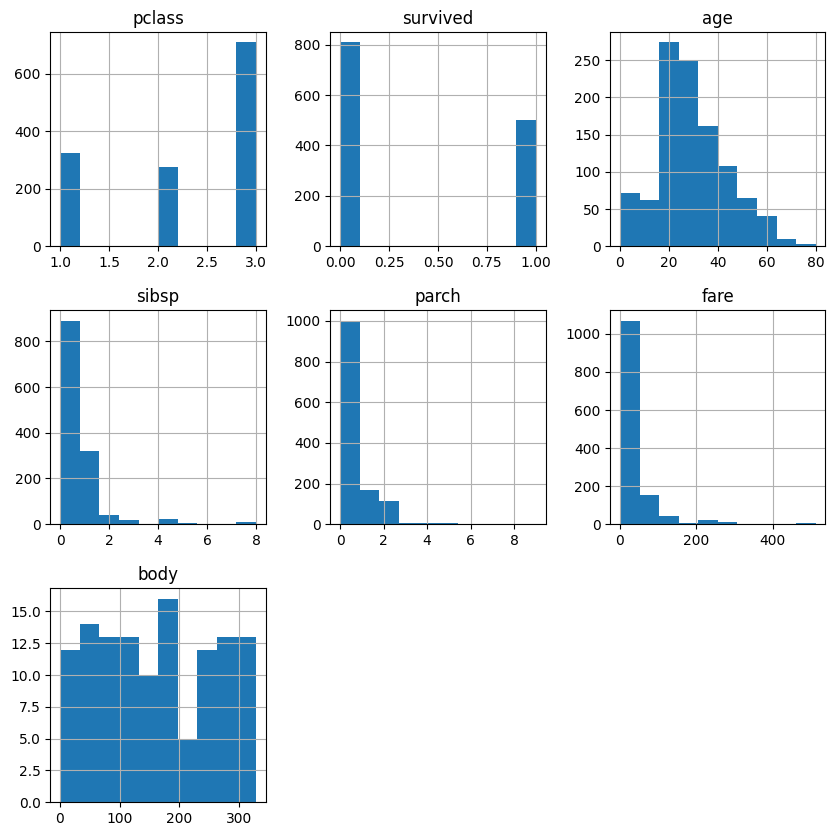

In [93]:
# 【82】
# dfのすべての数値列のヒストグラムを表示
#print(ans[82]) #回答表示
df = initialize1() #初期化

df.hist(figsize=(10,10))

<Axes: ylabel='Frequency'>

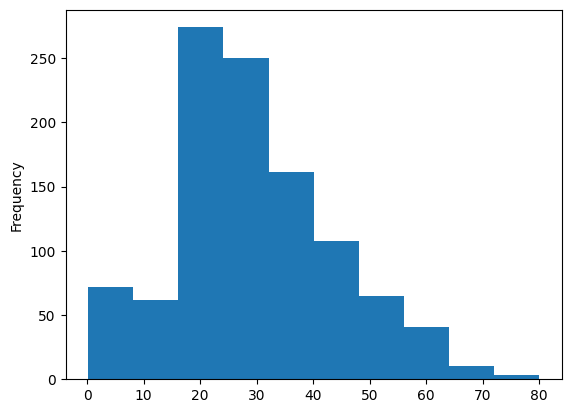

In [105]:
# 【83】
# dfのage列をヒストグラムで表示
#print(ans[83]) #回答表示
df = initialize1() #初期化

df['age'].plot(kind='hist')



<Axes: xlabel='name'>

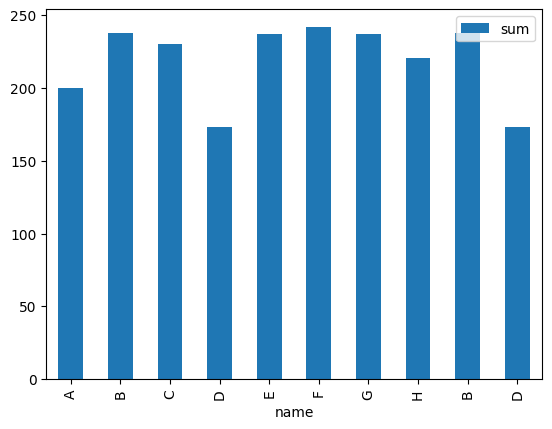

In [121]:
# 【84】
# df2のname列の要素ごとの3科目合計得点を棒グラフで表示
#print(ans[84]) #回答表示
df2 = initialize2() #初期化

df2.head()
df2['sum'] = df2.loc[:,['English', 'Mathematics', 'History']].sum(axis=1)
df_sum = df2[['name', 'sum']]

df_sum.plot(kind='bar', x=df2.columns[0])


<Axes: >

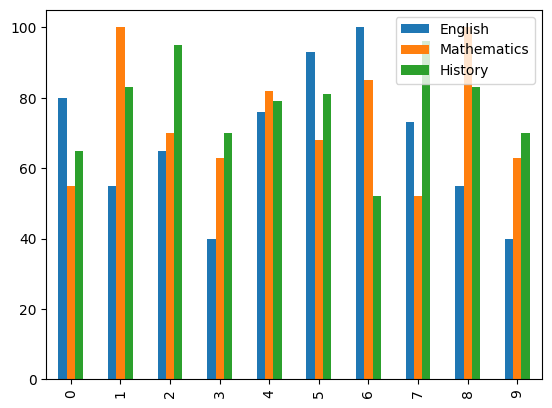

In [ ]:
# 【85】
# df2のname列の要素ごとの3科目を棒グラフで
# 並べて表示
#print(ans[85]) #回答表示
df2 = initialize2() #初期化

df2[['name', 'English', 'Mathematics', 'History']].plot(kind='bar', x=df2.columns[0])



<Axes: xlabel='name'>

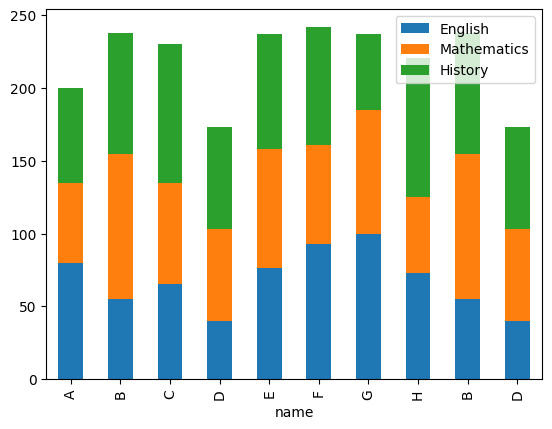

In [133]:
# 【86】
# df2のname列の要素ごとの3科目を積み上げ棒グラフで表示
#print(ans[86]) #回答表示
df2 = initialize2() #初期化

df2[['name','English','Mathematics','History']].plot(kind='bar', x=df2.columns[0], stacked=True)



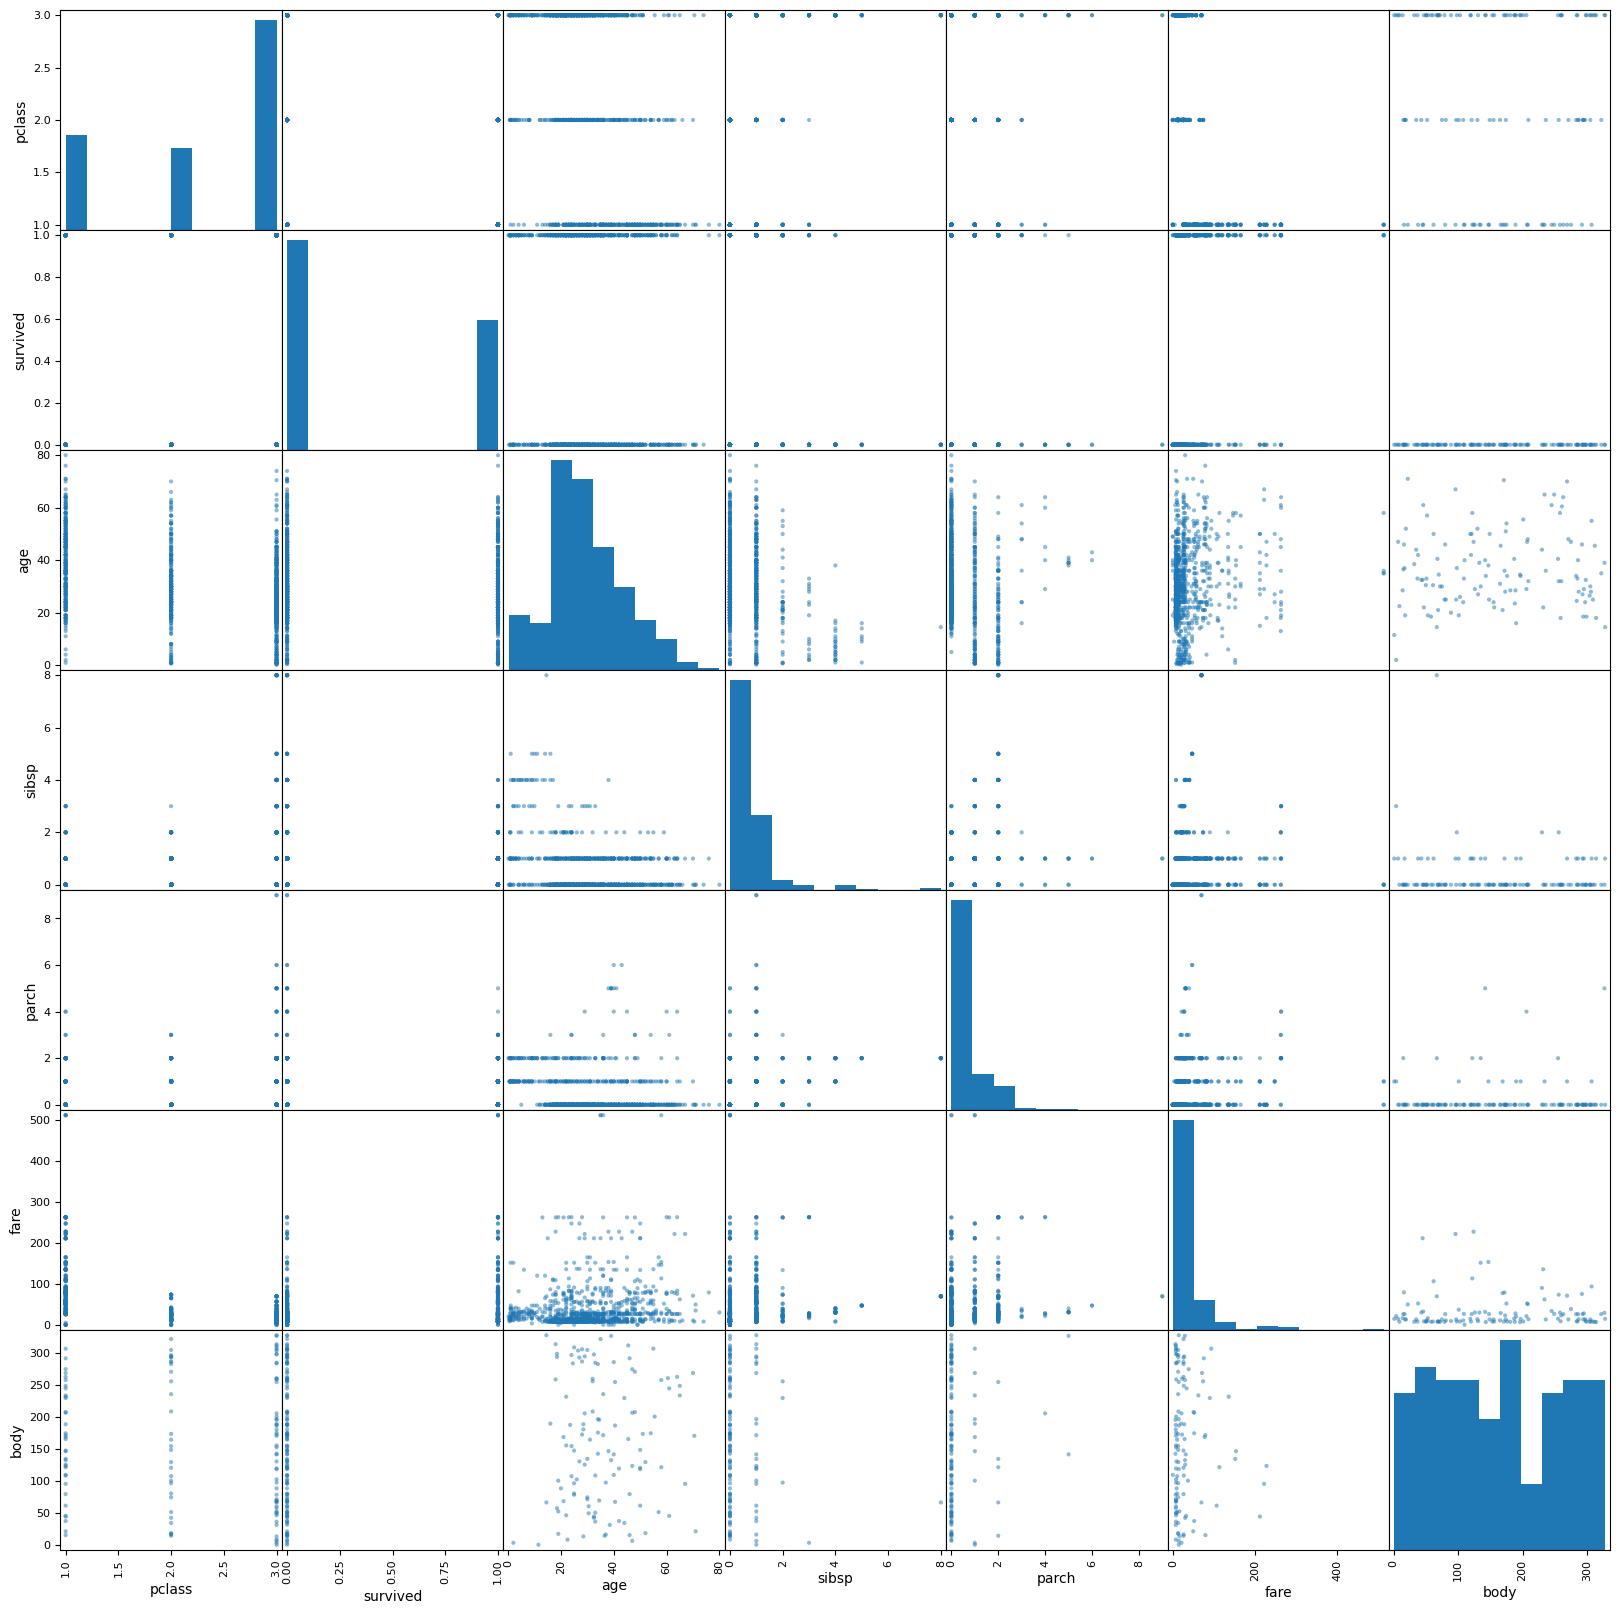

In [ ]:
# 【87】
# dfの各列間の散布図を表示
# (from pandas.plotting import scatter_matrixをインポート)
#print(ans[87]) #回答表示
df = initialize1() #初期化

from pandas.plotting import scatter_matrix

df_scatter = scatter_matrix(df, figsize=(20, 20))

<Axes: xlabel='age', ylabel='fare'>

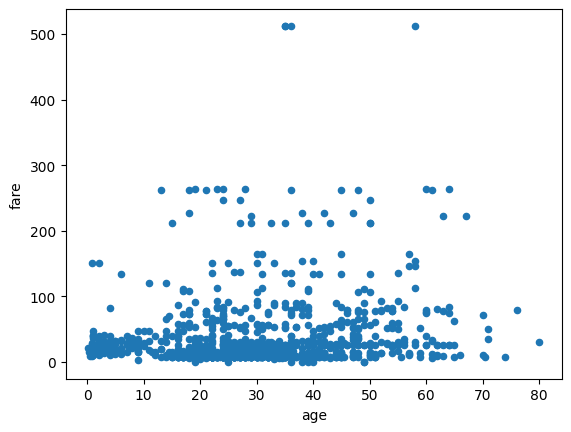

In [147]:
# 【88】
# dfのage列とfare列で散布図を作成
#print(ans[88]) #回答表示
df = initialize1() #初期化

df.plot(kind='scatter', x='age', y='fare')



<Axes: title={'center': 'age-fare scatter'}, xlabel='age', ylabel='fare'>

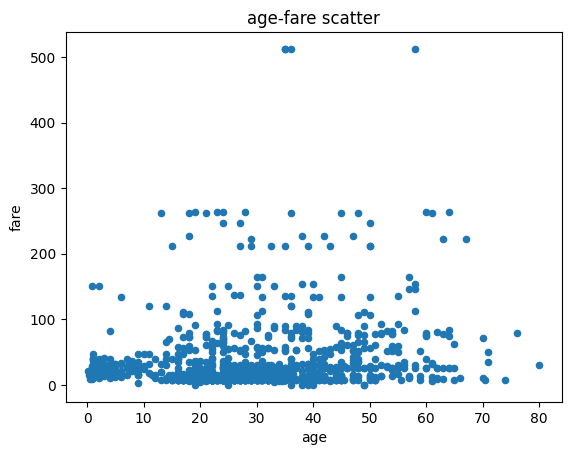

In [ ]:
# 【89】
# 【88】で描画したグラフに「age-fare scatter」という
# グラフタイトルをつける
#print(ans[89]) #回答表示
df = initialize1() #初期化

df.plot(kind='scatter', x='age', y='fare', title='age-fare scatter')

# タイタニック号の生存者予測 (90 - 100)  
これまで触れてきたタイタニック号の乗客データを使用して、乗客の生存有無を  
予測してみます。  
  
※90～100については順番通りにやらないと上手く動作しません

In [ ]:
# 【90】ラベルエンコーディング
# df_copyのsexとembarked列をラベルエンコーディング
# (from sklearn.preprocessing import LabelEncoderをインポート)
# (df_copyはdfをコピーしたもの)
#print(ans[90]) #回答表示
df_copy =df.copy()





In [ ]:
# 【91】欠損値確認
# df_copyの欠損値を確認
#print(ans[91]) #回答表示





In [ ]:
# 【92】欠損値補完
# df_copyのage、fare列の欠損値を各列の平均値で補完
#print(ans[92]) #回答表示





In [ ]:
# 【93】不要列の削除
# df_copyの中で機械学習で使用しない不要な行を削除
# (name, ticket, cabin, boat, body, home.destを削除)
#print(ans[93]) #回答表示





In [ ]:
# 【94】ndarray形式への変換
# ①df_copyのpclass、age、sex、fare、embarkedの列を抽出し、ndarray形式に変換
# ②df_copyのsurvivedの列を抽出し、ndarray形式に変換
# (①をfeatures、②をtargetという変数にそれぞれ格納)
#print(ans[94]) #回答表示





In [ ]:
# 【95】学習データとテストデータに分割
# 【94】で作成したfeatrues、targetを学習データとテストデータに分割
# (from sklearn.model_selection import  train_test_splitをインポート)
# ※分割時のパラメータは次を指定 test_size=0.3 random_state=0
#print(ans[95]) #回答表示





In [ ]:
# 【96】学習の実行
# 学習データ(features、target)を用いランダムフォレストにて学習を実行
# (from sklearn.ensemble import RandomForestClassifierをインポート)
# ※パラメータは次を指定 n_estimators=100 random_state=0
#print(ans[96]) #回答表示





In [ ]:
# 【97】予測の実行
# test_Xデータの乗客の生存を予測
#print(ans[97]) #回答表示





In [ ]:
# 【98】予測精度の確認
# 予測結果がtest_y(生存有無の答え)とどれぐらい
# 整合していたかを確認(評価指標はaccuracy)
# (from sklearn.metrics import accuracy_scoreをインポート)
#print(ans[98]) #回答表示





In [ ]:
# 【99】重要度の確認
# 学習における各列(特徴量)の
# 重要度を表示
#print(ans[99]) #回答表示





In [ ]:
# 【100】予測結果のcsv出力
# test_Xの予測結果をcsvでoutputフォルダに出力(ファイル名は「submission.csv」)
# (headerは不要)
#print(ans[100]) #回答表示





# ノックお疲れ様でした
各セルのoutput表示をすべてクリアにしたい場合は、ツールバーの  
「Kernel」→「Restart & Clear Output」を実行して下さい。